# 1. Importing The Necessary libraries


In [ ]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

# 2. Importing my Data Set

In [ ]:
# I'm using this cell of code to access the data file in the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FinData.csv')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,total_acc,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,loan_paid,Joint App,MORTGAGE,OWN,RENT,B,C,D,E,F,G,Source Verified,Verified,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,w
0,0,0,35000,0.1505,1214.15,110000.0,9.13,0,680,684,10,43573.779596,35000.0,8573.78,22049,9213.0,22800,46565,22049,18700,23765,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.0,1,4,5,4,4,2,5,6,5,7,1,80.0,0.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,3,16000,0.1903,586.74,58000.0,29.05,0,670,674,34,20685.951468,16000.0,4685.95,43001,22068.0,24100,53705,43001,24100,29605,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.0,0,8,8,8,20,4,8,27,8,10,2,95.7,75.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(15848, 63)

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1','loan_paid'], axis=1 , inplace=True)
df.shape

(15848, 76)

# 3. Normalization my Data-set
#### I used Min-Max to normalize my data

In [ ]:
scaler = MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df2 = pd.DataFrame(d, columns=names)
df2.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,total_acc,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,Joint App,MORTGAGE,OWN,RENT,B,C,D,E,F,G,Source Verified,Verified,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,w
0,0.871795,0.379042,0.706484,0.009947,0.009070,0.00000,0.129032,0.129032,0.074468,0.647746,0.874484,0.316910,0.010694,0.013308,0.034480,0.018596,0.025216,0.077666,0.035601,0.031461,0.083333,0.003891,0.232877,0.064145,0.050188,0.044521,0.010309,0.051282,0.166667,0.071429,0.111111,0.379128,0.307190,0.479149,0.000000,0.133333,0.107967,0.009013,0.037213,0.000000,0.030303,0.166667,0.138889,0.117647,0.075,0.011364,0.070175,0.057971,0.138889,0.082192,0.043478,0.762470,0.000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.384615,0.534086,0.339107,0.005219,0.029011,0.00000,0.064516,0.064516,0.329787,0.305500,0.397521,0.172774,0.020948,0.031877,0.036472,0.021582,0.049392,0.100336,0.044350,0.004494,0.208333,0.062257,0.465753,0.194079,0.395232,0.006849,0.020619,0.051282,0.000000,0.142857,0.213675,0.573976,0.522876,0.739574,0.090909,0.100000,0.088726,0.012344,0.014778,0.000000,0.000000,0.333333,0.222222,0.235294,0.475,0.034091,0.122807,0.362319,0.222222,0.123288,0.086957,0.948931,0.750,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.384615,0.571874,0.243762,0.003437,0.031894,0.00000,0.000000,0.000000,0.351064,0.323951,0.397521,0.218521,0.025580,0.035320,0.070799,0.038500,0.060315,0.143577,0.071391,0.017978,0.208333,0.042802,0.438356,0.238487,0.131744,0.027397,0.082474,0.051282,0.166667,0.500000,0.145299,0.465654,0.366013,0.512340,0.136364,0.166667,0.101160,0.010021,0.047414,0.000000,0.060606,0.333333,0.277778,0.264706,0.200,0.204545,0.210526,0.202899,0.277778,0.191781,0.173913,0.856295,0.667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.107692,0.160499,0.092996,0.010401,0.005796,0.03125,0.193548,0.193548,0.223404,0.081084,0.126406,0.016775,0.036745,0.094508,0.043522,0.033205,0.086640,0.086062,0.076015,0.004494,0.125000,0.046693,0.123288,0.263158,0.247177,0.003425,0.010309,0.076923,0.166667,0.071429,0.279202,0.144650,0.307190,0.265532,0.227273,0.200000,0.057850,0.018060,0.075425,0.000000,0.151515,0.125000,0.138889,0.147059,0.125,0.102273,0.140351,0.159420,0.138889,0.164384,0.304348,0.567696,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.219872,0.458512,0.195689,0.006583,0.030933,0.00000,0.322581,0.322581,0.351064,0.062599,0.050877,0.043860,0.037867,0.109736,0.017163,0.051458,0.089287,0.041142,0.170236,0.031461,0.041667,0.011673,0.205479,0.429276,0.306148,0.047945,0.030928,0.076923,0.166667,0.285714,0.250712,0.106341,0.490196,0.119149,0.000000,0.033333,0.016917,0.031992,0.039164,0.045418,0.121212,0.083333,0.055556,0.088235,0.300,0.193182,0.052632,0.231884,0.055556,0.082192,0.043478,0.834917,0.000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 4. Creating a HierarchicalClustering


## 4.1   I will investigate annual_inc Vs. total_pymnt

In [ ]:
data=df2[['annual_inc','total_pymnt']].copy()

### 4.1.1 Drawing DendoGram

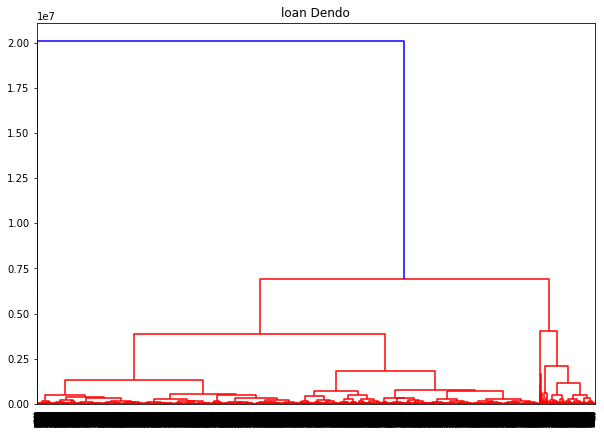

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("loan Dendo")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

## 4.1.2 Agglomrative Heirarichial Algorithm

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y=cluster.fit_predict(data)

[0 0 0 ... 0 0 0]


<Figure size 720x504 with 0 Axes>

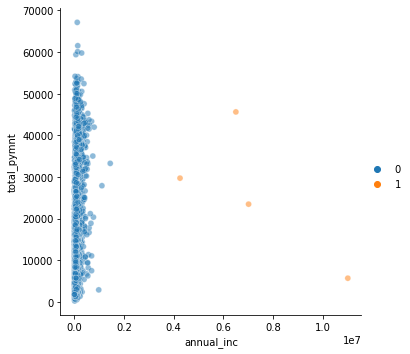

In [ ]:
plt.figure(figsize=(10, 7))
#plt.scatter(data["annual_inc"], data["total_pymnt"], c=cluster.labels_, cmap='rainbow')
sns.relplot(x=data["annual_inc"], y=data["total_pymnt"], hue=cluster.labels_, alpha=.5, data=data)